# Textbook Example

Following Steps from [https://lhbikos.github.io/ReC_Psychometrics/PAF.html]

## Install Packages

In [2]:
if(!require(psych)){install.packages('psych')}
if(!require(tidyverse)){install.packages('tidyverse')}
if(!require(MASS)){install.packages('MASS')}
if(!require(sjstats)){install.packages('sjstats')}
if(!require(apaTables)){install.packages('apaTables')}
if(!require(qualtRics)){install.packages('qualtRics')}

Loading required package: psych


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: sjstats


Attaching package: ‘sjstats’


The following object is masked from ‘package:psych’:

    phi


Loading required package: apaTables

Loading required package: qualtRics



## Input Correlation Matrix

Using data from [Confirmatory Factory Analysis for Applied Research](https://books.google.com/books?id=tTL2BQAAQBAJ), Chapter 2

In [4]:
cormat = matrix(
  c(1, .7, .65, .62,
    .7, 1, .66, .63,
    .65, .66, 1, .60,
    .62, .63, .60, 1),
    nrow = 4,
    ncol = 4)
round(cormat, 2)

1.00,0.70,0.65,0.62
0.70,1.00,0.66,0.63
0.65,0.66,1.00,0.60
0.62,0.63,0.60,1.00


## Check the Assumptions

### Kaiser-Meyer-Olkin

In [5]:
psych::KMO(cormat)

Kaiser-Meyer-Olkin factor adequacy
Call: psych::KMO(r = cormat)
Overall MSA =  0.84
MSA for each item = 
[1] 0.82 0.81 0.85 0.87

KMO should be greater than 0.5. ✅

### Bartlett's

Since we are using the correlation matrix, must include sample size (N = 300 in source data)

In [6]:
psych::cortest.bartlett(cormat, n = 300)

$chisq
[1] 607.2264

$p.value
[1] 6.44085e-128

$df
[1] 6

`p` value is < 0.001, which is significant ✅

### Determinant of Correlation Matrix

In [7]:
det(cormat)

[1] 0.1292921

Determinant must be greater than 0.00001 ✅

## Principal Axis Factoring

Run PAF with a number of factors greater than what we think we need, but less than the total number of items.

In [10]:
paf1 <- psych::fa(cormat, nfactors = 1, fm = 'pa', max.iter = 100, rotate='none')
paf1

Factor Analysis using method =  pa
Call: psych::fa(r = cormat, nfactors = 1, rotate = "none", max.iter = 100, 
    fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
   PA1   h2   u2 com
1 0.83 0.68 0.32   1
2 0.84 0.71 0.29   1
3 0.79 0.62 0.38   1
4 0.75 0.57 0.43   1

                PA1
SS loadings    2.58
Proportion Var 0.64

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

df null model =  6  with the objective function =  2.05
df of  the model are 2  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the residuals is  0.01 

Fit based upon off diagonal values = 1
Measures of factor score adequacy             
                                                   PA1
Correlation of (regression) scores with factors   0.94
Multiple R square of scores with factors          0.88
Minimum correlation of possible factor scores     0.77

Loadings (PA1) and Communalities match expected output! ✅

Eigenvalues are SS loadings.

![expected](expected.png)

Scree plot of eigenvalues

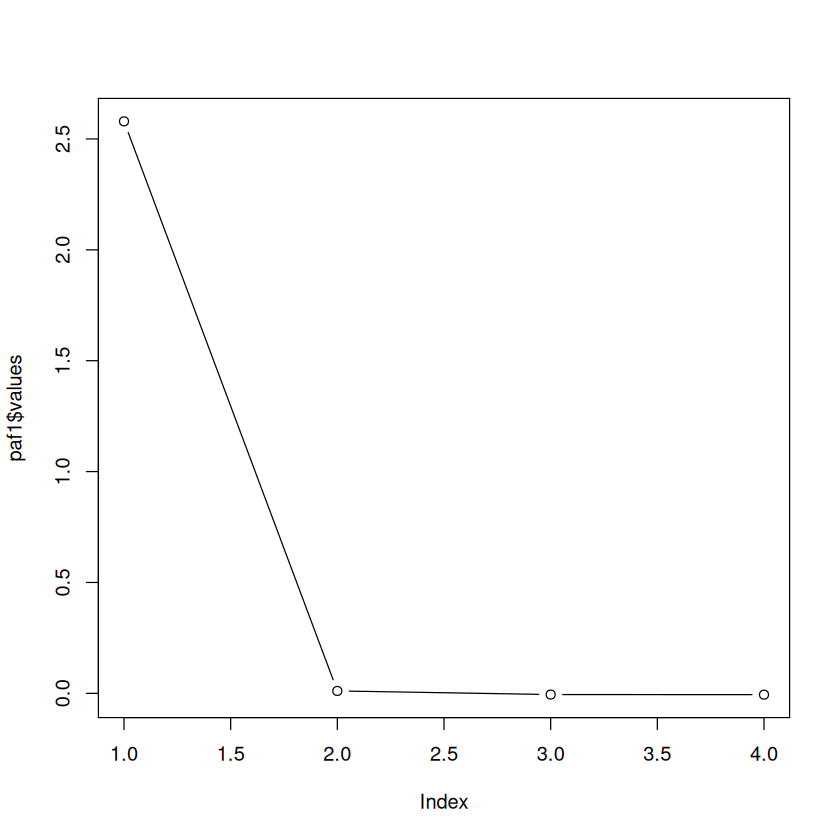

In [12]:
# White background
par(bg = "#FFFFFF")
plot(paf1$values, type = "b")

### Specifying number of factors

Repeat above process with desired number of factors based on Scree plot / Eigenvalues > 1. (Cannot do for this small dataset)

Examine communalities individually and as an average. Acceptable is > 0.40 to > 0.70 ✅

In [14]:
names(paf1)
mean(paf1$communality)

[1] "residual"               "dof"                    "ENull"                 
 [4] "chi"                    "rms"                    "nh"                    
 [7] "EPVAL"                  "crms"                   "EBIC"                  
[10] "ESABIC"                 "fit"                    "fit.off"               
[13] "sd"                     "factors"                "complexity"            
[16] "n.obs"                  "PVAL"                   "objective"             
[19] "criteria"               "Call"                   "null.model"            
[22] "null.dof"               "r.scores"               "R2"                    
[25] "valid"                  "weights"                "rotation"              
[28] "hyperplane"             "communality"            "communalities"         
[31] "uniquenesses"           "values"                 "e.values"              
[34] "loadings"               "model"                  "fm"                    
[37] "Structure"              "communality.iterations" "method"                
[40] "R2.scores"              "r"                      "fn"                    
[43] "Vaccounted"             "ECV"

[1] 0.6448313

We have high communality. Check the reproduced correlation matrix against the original.

In [15]:
round(psych::factor.residuals(cormat, paf1$loadings), 2)

0.32,0.01,0.00,0.00
0.01,0.29,0.00,0.00
0.00,0.00,0.38,0.01
0.00,0.00,0.01,0.43


Analyze the residuals by looking at the upper right triangle

In [16]:
paf1_residuals <- psych::factor.residuals(cormat, paf1$loadings)
paf1_residuals <- as.matrix(paf1_residuals[upper.tri(paf1_residuals)])
head(paf1_residuals)

0.005397743
-0.002590827
-0.002635390
-0.003011983
-0.002601274
0.005660168


Look for the number and percentage of residuals greater than 0.05.

In [17]:
large_residuals <- abs(paf1_residuals) > 0.05
sum(large_residuals)
round(sum(large_residuals) / nrow(paf1_residuals), 3)

[1] 0

[1] 0

Recommendation is for this to be below 50% ✅

## Factor Rotation

Use orthogonal if factors are independent

Use oblique if you think factors are related

In [19]:
paf1_oblique <- psych::fa(cormat, nfactors = 1, fm = 'pa', max.iter = 100, rotate = "oblimin")
paf1_oblique

Factor Analysis using method =  pa
Call: psych::fa(r = cormat, nfactors = 1, rotate = "oblimin", max.iter = 100, 
    fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
   PA1   h2   u2 com
1 0.83 0.68 0.32   1
2 0.84 0.71 0.29   1
3 0.79 0.62 0.38   1
4 0.75 0.57 0.43   1

                PA1
SS loadings    2.58
Proportion Var 0.64

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

df null model =  6  with the objective function =  2.05
df of  the model are 2  and the objective function was  0 

The root mean square of the residuals (RMSR) is  0 
The df corrected root mean square of the residuals is  0.01 

Fit based upon off diagonal values = 1
Measures of factor score adequacy             
                                                   PA1
Correlation of (regression) scores with factors   0.94
Multiple R square of scores with factors          0.88
Minimum correlation of possible factor scores     0.77